In [ ]:
#prepare a decision tree model using the gini index as the criteria on the iris.csv dataset
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.nunique()

,0
Id,150
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [ ]:
x = df.drop(["Species",'Id'],axis = 1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df['Species']
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
#If we do not specify the criteria for splitting the root node,by default the criteria is used is entropy
model = DecisionTreeClassifier(criterion='gini')
model

DecisionTreeClassifier()

In [ ]:
#initialize a dictionary to hold gini impurities for each feature
gini_impurities = {}


In [ ]:
#not a part of decision tree model
import numpy as np
arr = np.array([1,2,3,4,5,6])
print(arr)
print("Original array shape:",arr.shape)                     #****very very important for interviews****#

#Reshape array
reshaped_arr = arr.reshape(-1,1) #-1 : rows, 1 : columns,,,, -1: it will convert no of columns in to rows
print(reshaped_arr)
print("reshaped array shape:",reshaped_arr.shape)
# reshape command is used to reshape the numpy array or we can convert a single dimentional array to a multidimentionalk array
# while reshaping the one D array, make sure that the no of rows and columns shall be the factor of total no of elements present in the single D array

[1 2 3 4 5 6]
Original array shape: (6,)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
reshaped array shape: (6, 1)


In [ ]:
#the range of the array is called arange
#loop through each feature
for i in range(x.shape[1]):
  #fit the classifier with only the current feature
  model = model.fit(x.iloc[:,i].values.reshape(-1,1),y)  #iloc is used for is in book refer
  prob = model.predict_proba(x.iloc[:,i].values.reshape(-1,1))
  gini_impurities[i] = 1-(prob[:,0]**2+prob[:,1]**2+prob[:,2]**2).sum()

In [ ]:
#for i in range(x.shape[1]):
 # model = model.fit(x.iloc[:,i].values.reshape(-1,1),y)
  #prob = model.predict_proba(x.iloc[:,i].values.reshape(-1,1))
  #gini_impurities[i] = 1-(prob[:,0]**2+prob[:,1]**2+prob[:,2]**2).sum()


In [ ]:
#when we are writing the colon that means it takes the entire row or entire columnn

In [ ]:
x.shape[1]

4

In [ ]:
#find the feature with the lowest gini impurity
best_feature = min(gini_impurities, key=gini_impurities.get) # gini_impurities.get will give keys
print(f"Best Feature: {best_feature}")

Best Feature: 2


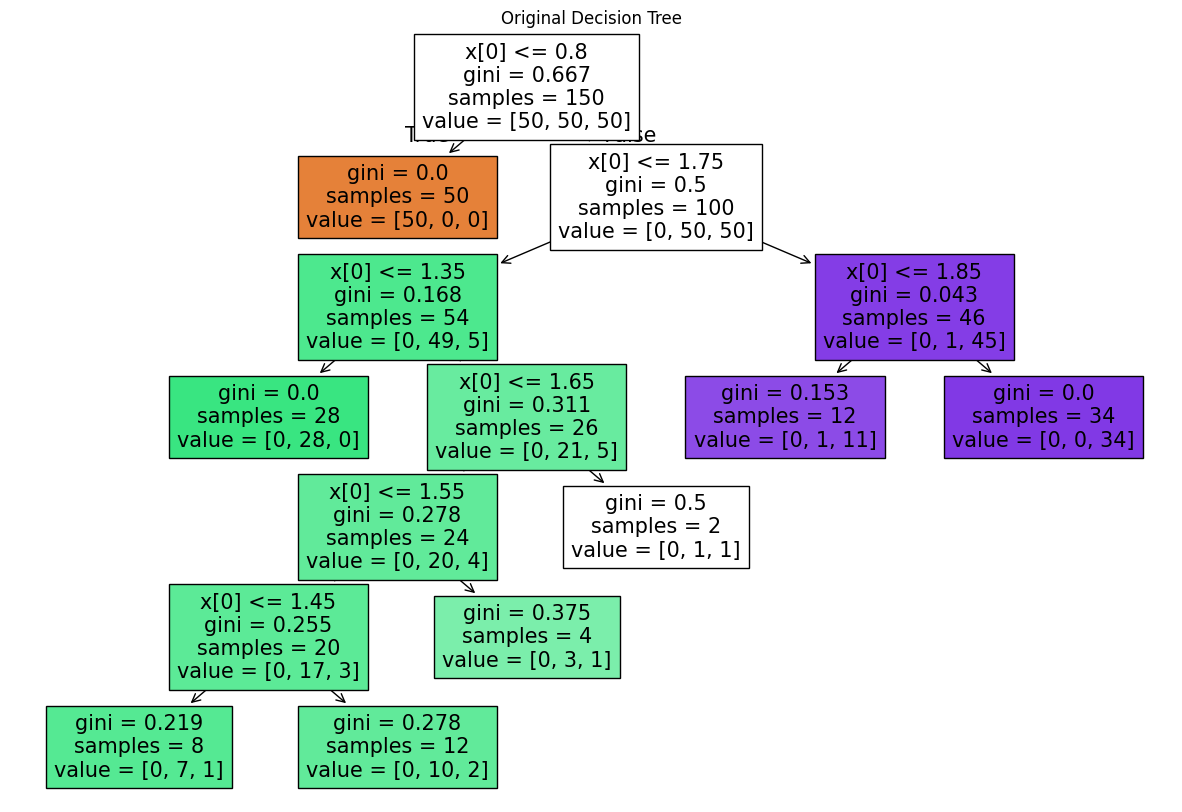

In [ ]:
#plot original tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True)
plt.title("Original Decision Tree")
plt.show()